<a href="https://colab.research.google.com/github/ethandsz/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **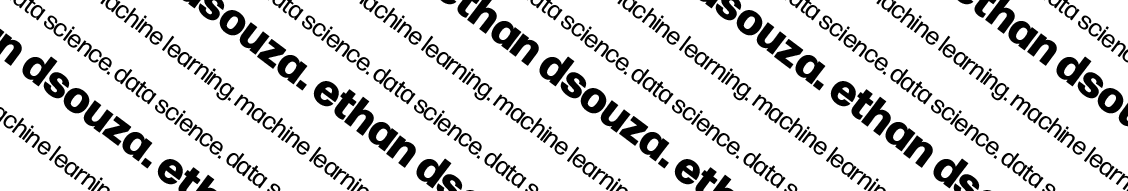News Headline Category Prediction**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Importing data, exploratory analysis, and setting target column(s) for training

In [ ]:
#raw = pd.read_excel('drive/MyDrive/Headline/Headlines.xlsx') 
raw = pd.read_excel('Downloads/Headlines.xlsx')

In [ ]:
raw

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
...,...,...,...,...,...,...,...
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,NaN,https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks,2012-01-28
200852,200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss To Hornets,NaN,https://www.huffingtonpost.com/entry/dwight-howard-rips-teammates-magic-hornets_us_5bb69b24e4b097869fd1b331,The five-time all-star center tore into his teammates Friday night after Orlando committed 23 turnovers en route to losing,2012-01-28


Dropping "Unnamed: 0" as it has no useful data

In [ ]:
raw.drop(columns="Unnamed: 0", inplace= True) 

Checking the number of categories and their names

In [ ]:
len(list(raw.category.unique()))

41

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
raw.describe()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_18604\79165625.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181121,200853
unique,41,199343,27992,200812,178332,2309
...,...,...,...,...,...,...
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [ ]:
raw.authors.unique().size

27993

In [ ]:
raw.authors.isna().sum()

36620

Dropping null/NaN values in the specified columns

In [ ]:
raw.dropna(subset = ['short_description', 'headline'], inplace = True) #Dropping all rows which contain Null/NaN values in the specified columns

Plot of the top 25 reported categories

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index[:25], y = raw.category.value_counts()[:25], labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Top 25 categories"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

In [ ]:
raw['date'] = pd.to_datetime(raw['date'])

In [ ]:
raw['year'] = raw['date'].dt.year

In [ ]:
plt.figure(figsize=(32,24));

fig = px.bar(x = raw.year.value_counts().index, y = raw.year.value_counts(), labels = {
    "x": "Year", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "*Year of publication*"); #Setting the title
fig.show(renderer="colab");

<Figure size 2304x1728 with 0 Axes>

# Combining Similar Categories

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
raw.loc[raw['category'] == 'FIFTY'].sample(5)

,category,headline,authors,link,short_description,date,year
121745,FIFTY,Living to 100?,"Jane Giddan and Ellen Cole, ContributorThose 70Candles women!",https://www.huffingtonpost.com/entry/living-to-100_b_5384496.html,It turns out that living to 100 is a real possibility for many of us in our 70s and for half of kids now in preschool.,2014-05-27,2014
106433,FIFTY,How Your Body Image Affects Your Daughter's Self-Esteem,"Dr. Margaret Rutherford, ContributorClinical Psychologist, Mental Health/Midlife Blogger",https://www.huffingtonpost.com/entry/body-image_b_6120000.html,"The legacy that remains is having to monitor my thinking. Occasionally my choices. Automatic calorie counts registering in my head. Picking toppings off of pizza. 'I don't like crust', I explain. (That's a bunch of hooey).",2014-11-17,2014
96451,FIFTY,Who's The Sexiest Man Over 60? You Decide,"Margaret Manning, ContributorAuthor, Founder of Sixtyandme.com",https://www.huffingtonpost.com/entry/sexiest-man-over-60_b_6800454.html,"One of the biggest misconceptions about aging is that we no longer care about beauty, sex or romantic companionship. What rubbish! Baby boomers today are challenging stereotypes and living life with verve and passion. We want to look great, even if we don't care what other people think.",2015-03-12,2015
109995,FIFTY,What We Can Learn From Taiwan About Aging,"Robyn Stone, ContributorSenior Vice President of Research at LeadingAge, Former Assist...",https://www.huffingtonpost.com/entry/aging-in-taiwan_b_5890828.html,"Imagine how exciting it would be to design a whole new system of care for older adults -- entirely from scratch. You'd be working with a clean slate, unencumbered by the temptation to retain old ways of operating, simply because 'we've always done it this way.'",2014-10-07,2014
108378,FIFTY,Childless by Choice - Gas Station Condoms and Rumors of Infertility,"Kevin B. Morrow, ContributorRealtor, Blogger, Baby Boomer - Convinced the movie ""Dazed and...",https://www.huffingtonpost.com/entry/childless-by-choice-gas-s_b_6050172.html,"Children can't be let out in the yard to play until you get up at 1:30 p.m. on Sunday because you were out late the night before. Dogs can. Cats don't even need to be let out, you can ignore them.",2014-10-26,2014


In [ ]:
raw.loc[raw['category'] == 'GREEN'].sample(5)

,category,headline,authors,link,short_description,date,year
68677,GREEN,SeaWorld Dolphin's Death Reveals More Dark Truths,NaN,https://www.huffingtonpost.comhttps://www.thedodo.com/betsy-seaworld-commersons-dolphins-1565648331.html,Another dolphin has died at SeaWorld â€” and her death shines light on the sad plight of one of SeaWorld's least-known animals,2016-01-22,2016
71706,GREEN,A Miracle Happens After This Bird Adopts A Store-Bought Egg,NaN,https://www.huffingtonpost.comhttps://www.thedodo.com/bird-adopts-egg-from-supermarket-1513715172.html,"Given their ubiquity as an ingredient in cooking, it's remarkably easy to forget that store-bought eggs weren't actually",2015-12-18,2015
20680,GREEN,"Moby, Russell Simmons And Others Speak Out On An Issue That Needs Our Immediate Attention","Marianne Schnall, ContributorWriter and interviewer",https://www.huffingtonpost.com/entry/moby-russell-simmons-and-others-speak-out-on-an-issue_us_59739805e4b0545a5c31008a,"""Going vegan was the most important lifestyle change I made.""",2017-07-24,2017
117222,GREEN,Federal Scientists Ordered to Drop Proposal to Protect Wolverines,"Noah Greenwald, ContributorEndangered species program director, Center for Biological Div...",https://www.huffingtonpost.com/entry/wolverine-protection-leaked-memos_b_5593028.html,"Just as we did with bald eagles, peregrine falcons, sea turtles and grizzlies, we have a legal and moral duty to protect wolverines, remarkable survivors able to sniff out carrion buried beneath several feet of snow.",2014-07-17,2014
109742,GREEN,"When Animals Disappear, So Do Our Social Structures","Avital Andrews, ContributorJournalist",https://www.huffingtonpost.com/entry/when-animals-disappear-so_b_5962404.html,Research out of UC Berkeley and UC Santa Barbara is providing evidence that a decline in animals actually means that our social structures are crumbling.,2014-10-10,2014


In [ ]:
raw.loc[raw['category'] == 'QUEER VOICES'].sample(5)

,category,headline,authors,link,short_description,date,year
129991,QUEER VOICES,Kate Logan's 'An Act of Love' Tells Story Of United Methodist Minister Frank Schaefer,James Michael Nichols,https://www.huffingtonpost.com/entry/an-act-of-love-kate-logan_us_5bafc388e4b0ad76926180a0,"Check out the video above or head here to visit the film's Kickstarter for more information. Frank Schaefer, a former Methodist",2014-02-22,2014
42994,QUEER VOICES,Dear Queer America: Here Is What We Must Do Now That Trump Will Be President,Noah Michelson,https://www.huffingtonpost.com/entry/queer-america-donald-trump-president_us_58230451e4b0d9ce6fc015e6,"Let us never stop fighting, even when the end of the world finally arrives.",2016-11-09,2016
185826,QUEER VOICES,Google Announces Worldwide 'Legalize Love' Campaign Plan In Support Of Gay Rights,NaN,https://www.huffingtonpost.com/entry/google-announces-support-same-sex-marriage_us_5bafa60de4b0ad76925f7b19,"And on Valentine's Day of this year, the company ran a gay-marriage themed Google Doodle. Google launched a new campaign",2012-07-08,2012
104872,QUEER VOICES,My Children Don't Know I'm a Lesbian,"Georgia Kolias, ContributorWriter, Huffington Post Blogger, Cultural Observer",https://www.huffingtonpost.com/entry/my-children-dont-know-im-_b_6263216.html,"I'm not the type of person who likes to keep secrets. I grew up in a house where secrets floated in the air at all times, and I never liked to keep track of who knew what. But when I realized at the age of sixteen that I was a lesbian, I suddenly had my own secret to keep track of.",2014-12-05,2014
57257,QUEER VOICES,Here's Your Chance To See This Gay Comedian Live Before He Blows Up,James Michael Nichols,https://www.huffingtonpost.com/entry/john-early-gay-comedian-live_us_574f0aa7e4b0ed593f12e76a,"""Iâ€™ve described myself and my act as the Robyn of comedy.""",2016-06-01,2016


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
57004,IMPACT,Finding Our Humanity in the Refugee Crisis: A Call to Action,"Suzie Abdou , ContributorSpecialist on democracy, governance & gender in MENA. World tr...",https://www.huffingtonpost.com/entry/finding-our-humanity-in-t_b_10291928.html,"This critical issue is not one of race, nationality, religion or politics but of humanity. It is a call to step out of our comfort zones, to look past our first world problems and to use our first world privilege to serve our fellow brothers and sisters.",2016-06-04,2016
116822,IMPACT,"Not All Migrant Kids Are Equal: Central Americans Get Court Dates, Mexicans Get the Boot","Erin Siegal McIntyre, ContributorInvestigative Journalist & Author",https://www.huffingtonpost.com/entry/post_8038_b_5589780.html,"There's a big difference between how Mexican and Central American kids are treated once they cross the border. Mexican children and teens are deported almost immediately, in what's called expedited repatriation. The Central Americans aren't-- that is, yet.",2014-07-22,2014
54002,IMPACT,This Project Is Committed To Reducing Food Waste In SÃ£o Paulo,"Ana Beatriz Rosa, HuffPost Brazil",https://www.huffingtonpost.com/entry/food-waste-project-sao-paulo_us_577fc161e4b01edea78d8990,"The ""Invisible Food"" initiative plans to set up a truck that serves food cooked with ingredients that would have otherwise been discarded.",2016-07-08,2016
152475,IMPACT,Madeleine Albright At Aspen Ideas Festival Talks Being A Woman In A Man's World (VIDEO),NaN,https://www.huffingtonpost.com/entry/madeleine-albright-aspen-ideas-festival_us_5bb1adfde4b01857b709f15b,"""The most famous thing I ever said was 'There's a special place in hell for women who don't help each other.'"" Madeleine",2013-06-29,2013
159070,IMPACT,Empathy in the Wake of Tragedy,"Toni Nagy, Contributor\nwriter, podcaster, tonibologna.com, overshareshow.com",https://www.huffingtonpost.com/entry/empathy-in-the-wake-of-tr_us_5bb1a9c0e4b01857b7098bc6,"There is much to learn from this horrific occurrence beyond the details that have yet to be revealed. Although it is human to seek vengeance against those who have caused pain, if this mindset is maintained our geo-political atmosphere will forever be at war.",2013-04-20,2013


In [ ]:
raw.loc[raw['category'] == 'WELLNESS'].sample(5)

,category,headline,authors,link,short_description,date,year
142306,WELLNESS,Drop the 'Shoulds',"Rick Hanson, Ph.D., Contributor\nPsychologist; Author, 'Hardwiring Happiness'",https://www.huffingtonpost.com/entry/mindfulness-practice_us_5b9d9896e4b03a1dcc89f707,"At bottom, ""shoulds"" are not about events. They're about what you want to experience (especially emotions and sensations) if your demands on reality are met, or what you fear you'll experience if they're not.",2013-10-15,2013
163447,WELLNESS,"British Health Care Lags Behind Other Countries, Despite Free Treatment","Reuters, Reuters",https://www.huffingtonpost.com/entry/british-health-care-lags_us_5b9ce384e4b03a1dcc82b862,"Researchers who compared Britain's health performance since 1990 with 14 European Union countries plus Australia, Canada",2013-03-05,2013
175080,WELLNESS,The Trick to Managing the Treats,"Michelle May, M.D., Contributor\nAuthor, 'Eat What You Love, Love What You Eat' book series; Fo...",https://www.huffingtonpost.com/entry/mindful-eating_us_5b9c6fbfe4b03a1dcc7ea1e9,Halloween candy showed up in August (as though we needed to get a jump on our holiday shopping!) and will still be on sale in November. So what is the trick to eating what you love when it is everywhere?,2012-10-31,2012
177771,WELLNESS,National Day Without Stigma,"Alison Malmon, Contributor\nExecutive Director & Founder, Active Minds",https://www.huffingtonpost.com/entry/national-day-without-stigma_us_5b9c5b99e4b03a1dcc7e0d0d,"This Oct. 9, in honor of Mental Health Awareness Week, Active Minds chapters across the country will gather on their campuses for National Day Without Stigma.",2012-10-03,2012
160177,WELLNESS,Going Home,"Mark Nepo, Contributor\nAuthor, New York Times bestseller â€˜The Book of Awakeningâ€™",https://www.huffingtonpost.com/entry/poetry_us_5b9d05f7e4b03a1dcc83d28d,"For all the dreams we dream and things we work toward, we sometimes stumble into a moment when what waits inside our dream somehow comes true. This poem speaks to such a moment.",2013-04-09,2013


In [ ]:
raw.loc[raw['category'] == 'FOOD & DRINK'].sample(5)

,category,headline,authors,link,short_description,date,year
156532,FOOD & DRINK,11 Year Old Kid Chef Revamps Meatloaf,"HooplaHa - Only Good News, Contributor\nHooplaHa is a media company focused on only good news. Our mis...",https://www.huffingtonpost.com/entry/11-year-old-kid-chef-reva_us_5b9d2c0be4b03a1dcc852326,Sauce: -Mix one cup meat broth with 3 tablespoons of ketchup It's an old Italian favorite with a kid-friendly twist. That's,2013-05-16,2013
171692,FOOD & DRINK,Chocolate Gifts For The Holidays (PHOTOS),NaN,https://www.huffingtonpost.com/entry/christmas-candy-chocolate-gifts_us_5b9c96f4e4b03a1dcc801774,"Think honeycomb candy, peanut butter cup marshmallows and chocolate covered nougat.",2012-12-07,2012
150631,FOOD & DRINK,Cannoli Recipes (PHOTOS),NaN,https://www.huffingtonpost.com/entry/cannoli-recipes-italian-filling_us_5b9d5b68e4b03a1dcc870897,Besides the ricotta and mascarpone filling.,2013-07-18,2013
155118,FOOD & DRINK,Fat Magnet: Taking All The Flavor Out Of Food,NaN,https://www.huffingtonpost.com/entry/fat-magnet-healthy-meals_us_5b9d3527e4b03a1dcc858a09,It's the quickest way to suck all the flavor from your food.,2013-05-31,2013
161599,FOOD & DRINK,Spring Onion Recipes To Celebrate The Season,NaN,https://www.huffingtonpost.com/entry/spring-onion-recipe_us_5b9cf663e4b03a1dcc834f48,"It's nice to see you again, guys. Winter was really cold.",2013-03-25,2013


In [ ]:
raw.loc[raw['category'] == 'BUSINESS'].sample(5)

,category,headline,authors,link,short_description,date,year
114787,BUSINESS,Success Isn't for You,"Chris Deaver, Contributor",https://www.huffingtonpost.com/entry/success-isnt-for-you_b_5674660.html,"Having come to a place in my career now that could be considered success, I've realized that success isn't for me. Now, before you write me off, let me explain.",2014-08-14,2014
180671,BUSINESS,Key to Success: Embrace Being Different,"Don McNay, Contributor\nBest selling lottery and structured settlement expert",https://www.huffingtonpost.com/entry/success-embrace-being-different_us_5bb2d1dee4b0480ca65cb1b1,"It's an interesting American paradox. People with my personality start big companies. Steve Jobs and Bill Gates are examples. Once the big companies get started, they never hire that same type of rebellious personality to work there. The few times I tried conforming, I failed miserably.",2012-09-02,2012
22186,BUSINESS,The Destructive Power Trips Of Amazonâ€™s Boss,"Ralph Nader, ContributorConsumer advocate, lawyer and author",https://www.huffingtonpost.com/entry/the-destructive-power-trips-of-amazons-boss_us_595e7fd2e4b08f5c97d06803,"For his smallish stature, Amazon Boss Jeff Bezos has a booming, uproarious laugh. Unleashed during workdays, its sonic burst",2017-07-06,2017
86747,BUSINESS,The Founding Fathers Were (Mostly) All Entrepreneurs,"Bill Murphy Jr., Contributorcontact.billmurphyjr.com",https://www.huffingtonpost.com/entry/the-founding-fathers-were_b_7699806.html,"There are some inspiring tales of self-made men within their midst. So as we celebrate the 239th anniversary of the adoption of the Declaration of Independence on July 4, here's a breakdown of some of their stories.",2015-07-02,2015
106756,BUSINESS,Is Spotify Fair to Musicians? A Chat With Mark Kelly,"Phil Simon, ContributorSpeaker, author, professor",https://www.huffingtonpost.com/entry/is-spotify-fair-to-musici_b_6159866.html,The fundamental question is one of fairness. Are artists being rightfully compensated for their contributions? And what about future artists? Will sufficient incentives exist for them to make music?,2014-11-14,2014


In [ ]:
raw.loc[raw['category'] == 'MONEY'].sample(5)

,category,headline,authors,link,short_description,date,year
185645,MONEY,Unemployment Benefits Mistakes Mean Americans Owe Government $14 Billion,Bonnie Kavoussi,https://www.huffingtonpost.com/entry/unemployment-benefits-mistake_us_5b9bf928e4b03a1dcc7b7a5e,"Colorado, for one, accidentally overpaid $128 million in jobless benefits last year and now is asking those recipients to",2012-07-10,2012
134680,MONEY,"A Skewed Realty Reality, In Northern California","Harvey Gotliffe, Ph.D., Contributor\nEditor and publisher, The Ho-Ho-Kus Cogitator",https://www.huffingtonpost.com/entry/northern-california-real-estate_us_5b9dbe3fe4b03a1dcc8c5235,"According to Forbes magazine, the highest median home price in the nation is $6,665,231 in Zip Code 94027 in Atherton, just north of the Silicon Valley.",2014-01-03,2014
129036,MONEY,Financial Animals: 8 Pets Who Can Teach Us Money Lessons,"LearnVest, Contributor\nLearnVest is a program for your money.",https://www.huffingtonpost.com/entry/financial-animals-8-pets_us_5b9de7f7e4b03a1dcc8e8041,"Despite their freedom from financial concerns, pets can actually teach us some useful lessons about what to do--and what not to do--with money.",2014-03-04,2014
125241,MONEY,5 Smart Ways to Spend (or Save) Your Tax Refund,"Lisa Greene-Lewis, Contributor\nCPA",https://www.huffingtonpost.com/entry/5-smart-ways-to-spend-or-save_us_5b9dfc0fe4b03a1dcc8fea10,"The first income tax day in U.S. history was on March 1, 1914. Four years later, Congress passed the ""Revenue Act,"" which moved tax day forward by two weeks to March 15, where it remained in effect until 1955. Why the change to April 15?",2014-04-15,2014
176194,MONEY,"Housing, Transportation Costs Consume Majority Of Middle-Income Earners' Paychecks: Study",Catherine New,https://www.huffingtonpost.com/entry/housing-transportation-costs-grew-faster-than-income-for-urban-middle-class-study_us_5b9c6d8fe4b03a1dcc7e8f1d,"While Mitt Romney and President Barack Obama debate who's is going to help the middle class more, the two candidates are",2012-10-19,2012


In [ ]:
raw.loc[raw['category'] == 'PARENTS'].sample(5)

,category,headline,authors,link,short_description,date,year
113092,PARENTS,5 Differences Between The First Day of Senior Kindergarten and Junior High,"Katia Bishops, ContributorBlogger at iamthemilk.wordpress.com - a Wordpress recommended ...",https://www.huffingtonpost.com/entry/5-differences-between-the-first-day-of-senior-kindergarten-and-junior-high_b_5750010.html,"""Are you excited about the first day of school?"" asked no child ever. This is a question reserved for grownups.",2014-09-02,2014
114747,PARENTS,"Gentlemen, Welcome To The Work-Life Balance Convo","Karin Agness, ContributorSenior Fellow, IWF, and Founder and President, Network of enli...",https://www.huffingtonpost.com/entry/gentlemen-welcome-to-the-_b_5673251.html,"Too often, these discussions are one-sided. Maybe women are more comfortable talking about such personal challenges, but it seems that many of these conversations leave out that men face challenges in this regard as well.",2014-08-14,2014
86080,PARENTS,Empowering Series Gives Princesses Lives Beyond Happily Ever After,Taylor Pittman,https://www.huffingtonpost.com/entry/princesses-with-a-twist-series_us_559e954ce4b01c2162a5fef3,"The usual fairy tale goes: Prince Charming sweeps a princess off her feet, they ride into the sunset and that's where the",2015-07-09,2015
24702,PARENTS,Mom's Emotional Note Captures The Guilt Of Parenting A Middle Child,Caroline Bologna,https://www.huffingtonpost.com/entry/moms-emotional-note-captures-the-guilt-of-parenting-a-middle-child_us_5935c74de4b013c4816a50d8,"""I see you.""",2017-06-06,2017
12291,PARENTS,"MC Hammer â€“ ""U Canâ€™t Touch This"" Parody | Donâ€™t Touch This","Deva Dalporto , ContributorMyLifeSuckers",https://www.huffingtonpost.com/entry/mc-hammer-u-cant-touch-this-parody-dont-touch_us_5a0346fde4b0204d0c171383,Iâ€™ve been a HUGE MC Hammer fan since I was a kid and Iâ€™m so excited to get to parody his classic song U Canâ€™t Touch This,2017-11-08,2017


In [ ]:
raw.loc[raw['category'] == 'PARENTING'].sample(5)

,category,headline,authors,link,short_description,date,year
179579,PARENTING,Preschool Gems: Portland Teacher Leslie McCollom On Her Twitter Feed And Book,NaN,https://www.huffingtonpost.com/entry/preschool-gems_us_5b9c28e9e4b03a1dcc7cb8e5,"If her school seems like particularly fertile ground for crazy kid talk, it may have something to do with Portland. Toddler",2012-09-13,2012
186901,PARENTING,Special Needs Crossroads,"Leda Natkin Nelis, Contributor\nFreelance writer",https://www.huffingtonpost.com/entry/special-needs_us_5b9be8e4e4b03a1dcc7b0f4d,"No one holds your hand when you are a special needs parent. No one leads you through the tangled web of diagnoses, treatment plans, nutritional input and educational advice.",2012-06-26,2012
164693,PARENTING,What Were They Thinking?! Weird & Just Plain Inappropriate Kid Toys,"Babble.com, Contributor\nReal parents sharing real moments that help you think, help yo...",https://www.huffingtonpost.com/entry/weird-and-inappropriate-toys_us_5b9cd73de4b03a1dcc82528c,"Here are five kids' toys that will have you asking, ""What were they thinking?""",2013-02-20,2013
144121,PARENTING,Tips For Quick and Easy Family Dinners,"Anjali Varma, Contributor\nThe Modern Mompreneur | l Owner, Kidville Bethesda I YouTube H...",https://www.huffingtonpost.com/entry/tips-for-quick-and-easy-family-dinners_us_5b9d8b92e4b03a1dcc895ab4,"All busy moms have faced this all-too-familiar scenario: it's 6:00, the kids are starving, you're exhausted and you have no idea what you're serving for dinner tonight! Couple that with an empty pantry or fridge and a picky eater and it is a ""recipe"" for disaster.",2013-09-25,2013
141343,PARENTING,Motherhood in the Workplace: I Was Asked to Tone-Down the 'Mommy Thing',"Nicole Dash, Contributor\nWriter, blogger and entrepreneur who unapologetically puts fam...",https://www.huffingtonpost.com/entry/motherhood-in-the-workplace_us_5b9d9c97e4b03a1dcc8a3757,"My children are everything to me and being a mother is a huge part of my identity. It has been for almost 15 years. That is except for the one year I was asked by my former boss, who also happened to be a woman, to tone down the ""mommy thing.""",2013-10-24,2013


In [ ]:
raw.loc[raw['category'] == 'TASTE'].sample(5)

,category,headline,authors,link,short_description,date,year
73176,TASTE,Star Wars Ice Cream Is A Delicious Trip To The Dark Side,Suzy Strutner,https://www.huffingtonpost.com/entry/star-wars-ice-cream-ample-hills_us_565ef83fe4b079b2818c9ba1,"Prepare for ice cream ""clones.""",2015-12-02,2015
71298,TASTE,5 Super Easy Christmas Cookie Recipes,Minou Clark,https://www.huffingtonpost.com/entry/easy-christmas-cookie-recipes_us_56786f90e4b0b958f6579809,Santa won't be able to resist. ðŸªðŸŽ„,2015-12-23,2015
110945,TASTE,A Chat With Javier Lo Forte of Pulenta Estate,"Daniel Altman, ContributorOwner, Argovino; Economist; Author",https://www.huffingtonpost.com/entry/a-chat-with-javier-lo-for_b_5890446.html,Have you ever heard of a winery whose guiding principle was humility?,2014-09-26,2014
26009,TASTE,"From Bulgaria to East Asia, the making of Japan's yogurt culture","The Conversation Global, ContributorThe Conversation is a collaboration between editors and academ...",https://www.huffingtonpost.com/entry/from-bulgaria-to-east-asia-the-making-of-japans-yogurt_us_59235128e4b07617ae4cbebb,One of Japanâ€™s biggest food trends right now is Bulgarian yoghurt.,2017-05-22,2017
116872,TASTE,Why Guy Savoy Should Be Your Favorite 3-Star Chef,"Gitanjali Roche, ContributorFood writer and editor of Gourmandize.com",https://www.huffingtonpost.com/entry/why-guy-savoy-should-be-y_b_5537899.html,"For Guy Savoy, it's all about feeding people -- the intensely intimate, powerful act of preparing something that will be consumed.",2014-07-21,2014


In [ ]:
raw.loc[raw['category'] == 'MEDIA'].sample(5)

,category,headline,authors,link,short_description,date,year
41333,MEDIA,Media Helps Boost Donald Trump's False Claim That 'Millions' Voted Illegally,Michael Calderone,https://www.huffingtonpost.com/entry/donald-trump-false-claim-millions-popular-vote_us_583b5ed0e4b09b605600e42a,Newsrooms are still coming to grips with a soon-to-be-president able to distract and distort on Twitter.,2016-11-28,2016
78353,MEDIA,RedState Names Leon Wolf Managing Editor As Erick Erickson Prepares Exit,Michael Calderone,https://www.huffingtonpost.com/entry/redstate-leon-wolf-erick-erickson_us_5612acdce4b0dd85030cb569,The influential conservative writer will focus more on his radio career.,2015-10-05,2015
9140,MEDIA,Bill O'Reilly's Latest Conspiracy Theory Is His Weirdest One Yet,Ed Mazza,https://www.huffingtonpost.com/entry/bill-oreilly-clothing-conspiracy-theory_us_5a39c875e4b06d1621b05251,"The former Fox News host's fashion-related ""tip of the day"" didn't go over so well.",2017-12-20,2017
28058,MEDIA,Fox News Breaks With AP And Top TV Networks For Election Day Polling,Michael Calderone,https://www.huffingtonpost.com/entry/fox-news-exit-polls-election_us_590265f7e4b05c39767d4190,The network quits an exit poll consortium amid concerns about the process that led to expectations Hillary Clinton would win.,2017-04-28,2017
82381,MEDIA,Politico Denies Unionizing Effort Was Behind Reporter's Departure,Michael Calderone,https://www.huffingtonpost.com/entry/politico-unionizing-mike-elk_us_55d632ffe4b0ab468da06558,The company says remaining staff members are free to organize.,2015-08-20,2015


In [ ]:
raw.loc[raw['category'] == 'WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
114694,WORLDPOST,Weekend Roundup: Not Doing Stupid Sh*t in Iraq,"Nathan Gardels, ContributorEditor-in-chief, The WorldPost",https://www.huffingtonpost.com/entry/weekend-roundup-29_b_5683395.html,"Keeping to his credo of ""don't do stupid sh*t,"" President Barack Obama sent in fighter planes to prevent ISIS from its genocidal assault on fleeing Yazidi refugees in northern Iraq, while also making it clear that the U.S. can just do so much. Only ""inclusive"" and ""non-maximalist"" governments in the Middle East, not deeper American intervention, he said in interviews this week, can ever stabilize the region. Peter Galbraith hailed this move against genocide as ""The Obama Doctrine."" Adel Guindy, an Egyptian Copt leader, called on the UN to live up to its pledge of ""never again"" to protect religious and ethnic minorities persecuted by those practicing ISIS' brand of Sunni fundamentalism. And WorldPost Middle East Correspondent Sophia Jones recounted the harrowing stories of Yazidi families that found their way to the Turkish border. (continued)",2014-08-15,2014
114577,WORLDPOST,A Dear Jon (Voight) Letter About Gaza and the History of the Israeli-Palestinian Conflict,"Mark Levine, ContributorAuthor; Professor, Middle Eastern History, UC Irvine & Cen...",https://www.huffingtonpost.com/entry/a-dear-jon-voight-letter-_b_5676282.html,"Your passion for defending Israel is clearly as great as your passion for acting. However, behind your passion is a view of Israel's history and current actions that are utterly at odds with the actual history and present-day realities in the country. They are simply dead-wrong.",2014-08-16,2014
118360,WORLDPOST,It's Time Kyiv Got It Right,"Brian Dooley, ContributorDirector, Human Rights First's Human Rights Defenders Program",https://www.huffingtonpost.com/entry/its-time-kyiv-got-it-righ_b_5560433.html,"Working with local LGBT activists from Mozaika in Latvia, I was lucky enough to be part of the early Riga Pride marches there from 2006, and in the first pride march in Lithuanian capital Vilnius in 2010. Those Baltic Pride events have proved a huge success.",2014-07-05,2014
99686,WORLDPOST,Israel: Beyond a Black and White View,"Diego Quezada, ContributorStudent, Duke University",https://www.huffingtonpost.com/entry/israel-beyond-a-black-and_b_6607034.html,"We will all become closer to achieving peace - as Israelis, Palestinians or concerned members of the international community - if we refrain from intransigence and instead take all perspectives into account.",2015-02-03,2015
113269,WORLDPOST,Margarita Murillo: Another Victim of Neoliberalism in Honduras?,"Marco CÃ¡ceres, ContributorEditor, Honduras Weekly",https://www.huffingtonpost.com/entry/margarita-murillo-another_b_5744476.html,"Land disputes between peasants and large landowners in Honduras go back decades. Agrarian reform has been perhaps the most contentious issue for any Honduran government to deal with since the 1950s and 1960s, and certainly the biggest challenge.",2014-08-31,2014


In [ ]:
raw.loc[raw['category'] == 'THE WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
38648,THE WORLDPOST,Argentina Reopens Case Accusing Ex-President Of Bombing Cover Up,NaN,https://www.huffingtonpost.com/entry/nisman-case-argentina_us_58658617e4b0eb586488d179,The prosecutor who first brought the allegation died mysteriously last year.,2016-12-29,2016
55037,THE WORLDPOST,Britons Turn To Poetry To Express Their Feelings On Brexit,Lee Moran,https://www.huffingtonpost.com/entry/brexit-britons-poetry-writeapoemaboutbrexit_us_576f87dae4b0dbb1bbbad011,Many lament the United Kingdom's decision to leave the European Union.,2016-06-26,2016
32041,THE WORLDPOST,'Cries From Syria' On HBO Follows Assadâ€™s War Against His Countryâ€™s Children,"Regina Weinreich, ContributorAuthor, 'Kerouac's Spontaneous Poetics'",https://www.huffingtonpost.com/entry/cries-from-syria-on-hbo-assads-war-against-his-countrys_us_58c69bcbe4b0c3276fb7871c,The regime claims it is protecting the country from terrorists.,2017-03-13,2017
57422,THE WORLDPOST,Crocodile Snatches Woman Taking Late-Night Swim In Australia: Report,"Byron Kaye, Reuters",https://www.huffingtonpost.com/entry/crocodile-attack-australia_us_574c06e9e4b055bb11727d9f,"""This is a tragedy but it was avoidable.""",2016-05-30,2016
73571,THE WORLDPOST,Top Politician Says Russia Has 'Right To Military Response' To Felled Plane,NaN,https://www.huffingtonpost.com/entry/russia-turkey-military-response-plane_us_56585657e4b08e945feb3022,"""This is intentional murder of our soldiers and this deed must be punished.""",2015-11-27,2015


In [ ]:
raw.loc[raw['category'] == 'GOOD NEWS'].sample(5)

,category,headline,authors,link,short_description,date,year
118896,GOOD NEWS,Who Invented the Universe?,"Peg Melnik, ContributorJournalist",https://www.huffingtonpost.com/entry/who-invented-the-universe_b_5540694.html,I'm grateful for this conversation because it seems as though science and spirituality have been long-time opponents in the ring. To have a scientist's take on the mystery of the universe is refreshing.,2014-06-29,2014
37912,GOOD NEWS,Community Teams Up To Save Cat Found Hanging From Garage Door,Hilary Hanson,https://www.huffingtonpost.com/entry/cat-rescued-trapped-garage-door_us_5871392ee4b043ad97e3aebd,"Bella the cat is either very lucky or very unlucky, depending on how you look at it.",2017-01-07,2017
56476,GOOD NEWS,'Baby Got Books' Display Will Make You Want To Tackle Daunting Reads,Kimberly Yam,https://www.huffingtonpost.com/entry/librarys-baby-got-books-display-will-make-you-want-to-tackle-daunting-reads_us_575acd75e4b0ced23ca7c9b2,War and Peace where you at?,2016-06-10,2016
53998,GOOD NEWS,Burrito Boyz Serves Hot Meals To Homeless People In San Diego,Kimberly Yam,https://www.huffingtonpost.com/entry/burrito-boyz-make-food-for-homeless-to-bring-hope-dignity-and-respect_us_577e99c5e4b01edea78cf63d,"They've provided more than 132,000 meals to people in need.",2016-07-08,2016
62777,GOOD NEWS,Hamster Spends His Final Days On The Best Adventures,NaN,https://www.huffingtonpost.comhttp://pubx.co/qjWRf7,"When a pet gets sick and doesn't have much time left, many incredible families will create bucket lists to make the animal's",2016-03-29,2016


In [ ]:
raw.loc[raw['category'] == 'WEDDINGS'].sample(5)

,category,headline,authors,link,short_description,date,year
187942,WEDDINGS,Matthew McConaughey Wedding Photo: The Dress,NaN,https://www.huffingtonpost.comhttp://stylenews.peoplestylewatch.com/2012/06/14/matthew-mcconaughey-wedding-camila-alves-dress/,"When it came to finding the perfect wedding gown, Camila Alves McConaughey knew exactly where to turn. Chanel? Nah. Vera",2012-06-15,2012
147437,WEDDINGS,Marriage Conversations You Need To Have Before Tying The Knot,NaN,https://www.huffingtonpost.com/entry/marriage-conversations_us_5b9d7409e4b03a1dcc882dc9,"Couples that communicate openly and effectively tend to have stronger, more successful marriages. And some conversations",2013-08-21,2013
170767,WEDDINGS,Wedding Dresses: The Weirdest Holiday-Themed Gowns (PHOTOS),NaN,https://www.huffingtonpost.com/entry/wedding-dresses_us_5b9c9ab4e4b03a1dcc803aac,"With the possibility of snow, a gorgeous, icy color palette and holiday cheer, it's true -- winter weddings can be wonderful",2012-12-17,2012
162642,WEDDINGS,Wedding Registry Trends For 2013,"Hana Abaza, Contributor\nWriting about tech, marketing, startups and other fun stuff.",https://www.huffingtonpost.com/entry/wedding-registry-trends_us_5b9cd352e4b03a1dcc822c10,"Couples are older and most are living together before marriage, eliminating the need for many of the traditional gifts.",2013-03-13,2013
183560,WEDDINGS,What Arranged Marriages Taught Me About Love,NaN,https://www.huffingtonpost.comhttp://www.ncregister.com/blog/jennifer-fulwiler/what-arranged-marriages-taught-me-about-love,I remember the first time I found out that one of my friends had an arranged marriage. I was at a work function and struck,2012-08-01,2012


In [ ]:
raw.loc[raw['category'] == 'WOMEN'].sample(5)

,category,headline,authors,link,short_description,date,year
91241,WOMEN,The Boy Next Door: Hollywood's Issue With Female Authority Figures,"Samita Sarkar, ContributorWriter/Editor at BlossomsEditing.com",https://www.huffingtonpost.com/entry/the-boy-next-door-hollywoods-issue-with-female-authority-figures_b_7246402.html,"The movie has sent a pretty clear message to viewers that men are by nature sexual and aggressive, and women should relent, know their place and not ""try too hard.""",2015-05-12,2015
70034,WOMEN,The Little Pink Pill That Started A Feminist War,NaN,https://www.huffingtonpost.comhttp://www.psmag.com/health-and-behavior/the-little-pink-pill-that-sparked-a-feminist-war,"Last October, the first medication designed to treat low sexual desire in women hit the market. Depending on who you believe",2016-01-07,2016
13815,WOMEN,"Here's How To Reply To All Those Irritating, Ignorant Responses To Your #MeToo Posts","Melinda Parrish, ContributorPlus Size Model and Body Positivity Advocate",https://www.huffingtonpost.com/entry/heres-how-to-reply-to-all-those-irritating-ignorant_us_59e69a10e4b0153c4c3ec3b4,"Yup, me too. I didnâ€™t just decide to participate in the #metoo movement because I want to speak my own truth (although I",2017-10-18,2017
83691,WOMEN,Watch This Comedian Skewer Anti-Abortion Logic,Alanna Vagianos,https://www.huffingtonpost.com/entry/watch-this-comedian-skewer-anti-abortion-logic_us_55c366d8e4b0f1cbf1e3d322,Cameron Esposito for president.,2015-08-06,2015
16968,WOMEN,The 20 Funniest Tweets From Women This Week,Alanna Vagianos,https://www.huffingtonpost.com/entry/the-20-funniest-tweets-from-women-this-week_us_59ae9fefe4b0dfaafcf281b8,ðŸ˜‚ ðŸ˜‚ ðŸ˜‚,2017-09-08,2017


In [ ]:
raw.loc[raw['category'] == 'HOME & LIVING'].sample(5)

,category,headline,authors,link,short_description,date,year
128910,HOME & LIVING,How to Buy Vintage Furniture Online,"Alessandra Wood, PhD, Contributor\nDirector of Style, Modsy",https://www.huffingtonpost.com/entry/how-to-buy-vintage-furnit_us_5b9dea6ee4b03a1dcc8ea3d3,"I've got a hit list of things to consider and questions to ask before buying vintage furniture online, so you can be sure to rule out a lot of issues before you take the big purchasing plunge.",2014-03-06,2014
162364,HOME & LIVING,Pretty Porch Ideas That Have Us Daydreaming Of Relaxation (PHOTOS),Michelle Manetti,https://www.huffingtonpost.com/entry/pretty-porch-ideas_us_5b9cefcce4b03a1dcc831798,"We're anxiously looking forward to the upcoming change of weather, when we'll be more inclined to relax and unwind outdoors",2013-03-16,2013
163933,HOME & LIVING,"Nate Berkus, Jeremiah Brent Reportedly Planning To Have A Baby",Michelle Manetti,https://www.huffingtonpost.com/entry/nate-berkus-jeremiah-brent-baby_us_5b9cdf20e4b03a1dcc8297bb,"** Now, for the most exciting news you'll hear all day: Nate Berkus and his partner Jeremiah Brent are reportedly planning",2013-02-28,2013
149917,HOME & LIVING,"7 Things That May Not Be Allowed On Your Front Lawn, Surprisingly (PHOTOS)",Shana Ecker,https://www.huffingtonpost.com/entry/not-allowed-on-front-lawn_us_5b9d625ee4b03a1dcc8757a0,"** 6. Paint Colors: some HOAs are so strict, they dicatate all of your home's colors, down to the trim. One Virginia Beach",2013-07-26,2013
199093,HOME & LIVING,Trending LED: Switch Out Your Incandescent and CFLs to LED Light Bulbs,"Marcia Prentice, Contributor\nInterior Designer and former blogger, Style Illuminated by LAM...",https://www.huffingtonpost.com/entry/led-light-bulbs_us_5b9b5699e4b03a1dcc76bd2b,"To find out what all the LED hype was about, I headed down the hall to our light bulb buyer's office to round up a handful of LED bulbs and get a quick LED light bulb lesson.",2012-02-16,2012


In [ ]:
raw.loc[raw['category'] == 'TRAVEL'].sample(5)

,category,headline,authors,link,short_description,date,year
167236,TRAVEL,The Faded Motels Of The Rust Belt (PHOTOS),"Randy Fox, Contributor\nWriter and photographer",https://www.huffingtonpost.com/entry/motels-rust-belt_us_5b9cbe30e4b03a1dcc816666,"As you travel through the Rust Belt, you can still come across the remains of hotels and motels still touting marketing innovations such as ""Color TV"" or ""Air Conditioning.""",2013-01-24,2013
136566,TRAVEL,International Data Plans Compared: How Does Your Phone Bill Stack Up? (INFOGRAPHIC),NaN,https://www.huffingtonpost.com/entry/international-data-plans_us_5b9d98fde4b03a1dcc89fb7b,"Explore more infographics like this one on the web's largest information design community - Visually. However, that last",2013-12-13,2013
186233,TRAVEL,Disneyland Travel: 14 Official And Unofficial Streets Inside Disneyland (PHOTOS),NaN,https://www.huffingtonpost.com/entry/disneyland-travel-14-official-and-unofficial-streets-inside-disneyland_us_5b9bed25e4b03a1dcc7b2c2a,"Of course not. For more Disneyland fun, check out these five lost Disneyland rides and these awesome vintage Disneyland commercials",2012-07-03,2012
196509,TRAVEL,The Destruction Of Phnom Penh's Lake District,"Matt Kepnes, Contributor\nAward-winning budget travel site, Nomadic Matt's Travel Site",https://www.huffingtonpost.com/entry/the-tragic-destruction-of_us_5b9b7266e4b03a1dcc779e1b,"All that remains of this once vibrant area is a bunch of torn down buildings, empty lots and shacks.",2012-03-15,2012
193522,TRAVEL,What To Do In Copenhagen: Danish Day Trips,NaN,https://www.huffingtonpost.comhttp://www.bbc.com/travel/feature/20120412-day-trips-from-copenhagen?OCIDtwtvlhp,"While there is no end to the number of activities in Copenhagen, the city's surrounds have equally abundant offerings - from",2012-04-16,2012


In [ ]:
raw.loc[raw['category'] == 'STYLE & BEAUTY'].sample(5)

,category,headline,authors,link,short_description,date,year
154962,STYLE & BEAUTY,Ashley Olsen's Polo Dress Is Really Confusing Us (PHOTOS),NaN,https://www.huffingtonpost.com/entry/ashley-olsen-polo-dress-photo_us_5b9d3681e4b03a1dcc859c1e,"Ashley, the Olsen most closely associated with classic, understated style, seems to be changing her tune. We scratched our",2013-06-02,2013
171912,STYLE & BEAUTY,Dianna Agron's Tan Is So Dark We Barely Recognized Her (PHOTOS),Ellie Krupnick,https://www.huffingtonpost.com/entry/dianna-agron-tan-dark-photos_us_5b9c9576e4b03a1dcc800ba4,"What happened to you, Quinn Fabray ?",2012-12-05,2012
189952,STYLE & BEAUTY,"Beauty Street Style: Christine Dayrit, Biology Student, Reveals Her Bright-But-Wearable Pink Lipstick Shade",Simone Kitchens,https://www.huffingtonpost.com/entry/beauty-street-style-real-girl_us_5b9bc10ee4b03a1dcc7a13fc,"In our series FaceTime, we find inspiring girls around New York City and get the secrets to their look. This week we met",2012-05-24,2012
190979,STYLE & BEAUTY,"Vogue June 2012 Cover Features Serena Williams, Ryan Lochte & Hope Solo (PHOTO)",NaN,https://www.huffingtonpost.com/entry/vogue-june-2012-cover-serena-williams_us_5b9bb54ae4b03a1dcc79c1ec,"""Men -- who needs 'em?"" has been Vogue's approach to cover stars for the past, oh, century. But for the mag's June 2012 issue",2012-05-13,2012
133062,STYLE & BEAUTY,5 Of The Most Popular Plus Size Models,"Stephanie Penn, Contributor\nEditor at DailyVenusDiva.com",https://www.huffingtonpost.com/entry/5-of-the-most-popular-plu_us_5b9dcccbe4b03a1dcc8d0bd6,"TESS MUNSTER MODELING FOR DOMINO DOLLHOUSE In the plus size community, no one is more popular than plus size models so when",2014-01-21,2014


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
152444,IMPACT,Afternoon Of Conversation (VIDEO),"The Aspen Institute, The Aspen Institute",https://www.huffingtonpost.com/entry/aspen-ideas-festival-2013_us_5bb1adfee4b01857b709f1c0,"Tweets about ""#aspenideas"" TIME: 4:00pm-7:00pm EST For more information and a schedule of events for the 2013 Aspen Ideas",2013-06-29,2013
60115,IMPACT,New App Uses Push Notifications To Reach Nonprofit Donors Faster,Kalya Koltes,https://www.huffingtonpost.com/entry/letsalldogood-nonprofit-donation_us_57224c49e4b01a5ebde4e0b4,Charities are getting a boost.,2016-04-29,2016
115596,IMPACT,Making a Difference in the World of Giving: The Summer-Athon Season,"Lisa M. Dietlin, ContributorCEO, Lisa M. Dietlin and Associates, Inc., philanthropic advis...",https://www.huffingtonpost.com/entry/making-a-difference-the-w_37_b_5641863.html,Some might say it is too late to participate but I would counter with that now is the perfect time for you to get involved and be Making A Difference!,2014-08-04,2014
110731,IMPACT,Why The Fight For Maternal and Child Health Is A Race Against Time,"Sharon D'Agostino, ContributorVice President, Corporate Citizenship at Johnson & Johnson",https://www.huffingtonpost.com/entry/why-the-fight-for-materna_b_5889716.html,"When we entered the delivery room of a small hospital in rural Malawi, our eyes went immediately to the two newborns lying side by side.",2014-09-29,2014
87730,IMPACT,A Tribute to a Father,"Dr. Jane Aronson, ContributorPediatrician and CEO, Worldwide Orphans",https://www.huffingtonpost.com/entry/a-tribute-to-a-father_b_7629910.html,I wish that I had listened to my father more. I wish I let things that hurt roll off my back more and trusted that being natural and myself was safe. He advised me to pursue so many goals for myself and I didn't listen because I did not believe in myself. He wanted me to trust myself and I fought him on this.,2015-06-21,2015


In [ ]:
raw.loc[raw['category'] == 'SCIENCE'].sample(5)

,category,headline,authors,link,short_description,date,year
111178,SCIENCE,Vaccinations: An Epidemic of Misinformation,"Jeff Schweitzer, ContributorScientist and former White House Senior Policy Analyst; Ph.D. ...",https://www.huffingtonpost.com/entry/vaccinations-an-epidemic_b_5877630.html,"Ignorance, false claims to expertise and scientific illiteracy are threatening our children's health.",2014-09-24,2014
130475,SCIENCE,Is The Universe A Simulation?,NaN,https://www.huffingtonpost.comhttp://www.nytimes.com/2014/02/16/opinion/sunday/is-the-universe-a-simulation.html,"IN Mikhail Bulgakovâ€™sÂ novel â€œThe Master and Margarita,â€ the protagonist, a writer, burns a manuscript in a moment of despair",2014-02-17,2014
151103,SCIENCE,"Neanderthal Language & Speech Shared With Modern Humans A Million Years Ago, Researchers Say",Melissa Cronin,https://www.huffingtonpost.com/entry/neanderthal-language-speech-modern-humans_us_5baeb816e4b014374e2e6d2e,"While many believe that modern language began around 50,000 years ago, the paper names a period about a million years ago",2013-07-13,2013
85408,SCIENCE,"New Photo Shows Pluto's 'Heart' Actually A Vast, Frozen Wasteland",Ryan Grenoble,https://www.huffingtonpost.com/entry/pluto-heart-photo-data_us_55a94deae4b0d2ded39eebef,"Warm and fuzzy from afar, cold and barren up close.",2015-07-17,2015
139777,SCIENCE,"Ancient Cave Drawings Found In Brazil Depict Armadillos, Other Animals (PHOTOS)","LiveScience, LiveScience",https://www.huffingtonpost.com/entry/cave-drawings-brazil_us_5baebc55e4b014374e2ea845,"White-lipped peccaries may not be glamorous-looking, but like their truffle-sniffing cousins, they sometimes turn up treasure",2013-11-10,2013


In [ ]:
raw.loc[raw['category'] == 'ARTS & CULTURE'].sample(5)

,category,headline,authors,link,short_description,date,year
28084,ARTS & CULTURE,This Instagram Account Is Documenting Every Anti-Donald Trump Sticker In NYC,Lee Moran,https://www.huffingtonpost.com/entry/instagram-resistrump-stickers-nyc-trump_us_5902f041e4b05c39767d7710,"""Itâ€™s a way of dealing with and trying to make at least a little light out of a dark situation.""",2017-04-28,2017
45946,ARTS & CULTURE,Stunning 'Soundsuits' Address The Realities Of Racial Profiling In America,Katherine Brooks,https://www.huffingtonpost.com/entry/nick-cave-soundsuits_us_57f79dcae4b0e655eab37e67,"â€œThe soundsuits hide gender, race, class and they force you to look at the work without judgment.â€",2016-10-07,2016
62953,ARTS & CULTURE,You Should Probably Follow The 'Mushroom Ninja' On Instagram,Priscilla Frank,https://www.huffingtonpost.com/entry/please-follow-this-mushroom-ninja-on-instagram-right-now_us_56f94e0ee4b0143a9b48aa1f,"The true ""champignon"" of mushroom photography.",2016-03-28,2016
9751,ARTS & CULTURE,Merriam-Webster Expertly Sums Up 2017 With Its Word Of The Year,Lee Moran,https://www.huffingtonpost.com/entry/merriam-webster-word-of-the-year-2017_us_5a2fd37fe4b01598ac48045f,"No, it's not ""dotard"" -- although Kim Jong Un's insult did make the top 10.",2017-12-12,2017
25374,ARTS & CULTURE,Minnesota Museum To Remove Gallows Exhibit After Native American Protest,Mary Papenfuss,https://www.huffingtonpost.com/entry/walker-gallows-exhibit-dismantling_us_592b7914e4b0df57cbfc7432,"The work, which depicts a structure where 38 Dakota Indians were killed, was criticized for being insensitive.",2017-05-29,2017


In [ ]:
raw.loc[raw['category'] == 'CRIME'].sample(5)

,category,headline,authors,link,short_description,date,year
164883,CRIME,Brothers Blow Up House Celebrating Lottery Win In Kansas: Cops,NaN,https://www.huffingtonpost.com/entry/brothers-blow-up-house-lottery-kansas_us_5ba2bee5e4b0c2784da5768a,From the Wichita Eagle: One of the brothers went to the kitchen to refuel the butane torches they planned to use to light,2013-02-18,2013
73982,CRIME,This Fake Gun Made From Soap Was Part Of Prison Escape Plot,Lee Moran,https://www.huffingtonpost.com/entry/fake-gun-prison-escape_us_5651b44be4b0879a5b0b59f2,Two prisoners face additional charges after the phony weapon was discovered inside a cell.,2015-11-22,2015
60160,CRIME,FBI arrests brother of San Bernardino terrorist and 2 others on marriage fraud charges,NaN,https://www.huffingtonpost.comhttp://www.latimes.com/local/lanow/la-me-ln-fbi-serves-san-bernardino-warrants-20160428-story.html,"Federal agents arrested three people, including the older brother of San Bernardino gunman Syed Rizwan Farook,Â on charges",2016-04-28,2016
83482,CRIME,"Young, Unarmed Black Man Killed By Cop Didn't Want To 'Die Too Young'",Sebastian Murdock,https://www.huffingtonpost.com/entry/young-unarmed-black-man-killed-by-cops-didnt-want-to-die-too-young_us_55c6283ae4b0923c12bd0fa7,"""I don't feel protected by the police.""",2015-08-08,2015
82086,CRIME,Officer Shot In The Head While Trying To Help Motorist Dies,NaN,https://www.huffingtonpost.com/entry/officer-shot-in-the-head-while-trying-to-help-motorist-dies_us_55db5f50e4b0a40aa3ab9f17,"""Tragically these things happen far too often around the country.""",2015-08-24,2015


In [ ]:
raw.loc[raw['category'] == 'RELIGION'].sample(5)

,category,headline,authors,link,short_description,date,year
81626,RELIGION,'Nuns On The Bus' To Drive Through Seven States To Greet The Pope,"David Gibson, Religion News Service",https://www.huffingtonpost.com/entry/nuns-on-the-bus-to-drive-through-seven-states-to-greet-the-pope_us_55ddf775e4b0a40aa3ad1aea,They plan to park themselves where the pope can see them.,2015-08-29,2015
86356,RELIGION,Pope Francis Sends Blessing To Young Athlete Fighting Leukemia,Antonia Blumberg,https://www.huffingtonpost.com/entry/pope-francis-lichu-zeno-leukemia_us_559ad26de4b0759e2b50e3a8,"Even in the midst of aÂ journey to Latin America, Pope Francis took a moment on Sunday to send a message of hope to a young",2015-07-06,2015
22414,RELIGION,When Gospel Sermons Came On The Phonograph,"The Conversation US, ContributorViews from experts in academia, providing fact-based analysis ...",https://www.huffingtonpost.com/entry/when-gospel-sermons-came-on-the-phonograph_us_5958fda5e4b0326c0a8d1176,"By Jerry Zolten, Pennsylvania State University â€œKinky Hair is No Disgraceâ€ spoke to demoralization stemming from negative",2017-07-03,2017
85926,RELIGION,Pope Francis' Mass In Paraguay Is Like A Makeshift Argentine Homecoming,"Peter Prengaman And Nicole Winfield, Associated Press",https://www.huffingtonpost.com/entry/pope-francis-mass-in-paraguay-is-like-a-makeshift-argentine-homecoming_us_55a135dde4b0a47ac15cabdc,"Youth groups chanted ""Pope Francis, Paraguay is with you!""",2015-07-11,2015
46852,RELIGION,New York City Is Taking Aim At Islamophobia,"Ellen Wulfhorst, Reuters",https://www.huffingtonpost.com/entry/new-york-city-is-taking-aim-at-islamophobia_us_57eaab46e4b0c2407cd9ddc3,A new social media campaign is trying to fight discrimination against American Muslims.,2016-09-27,2016


In [ ]:
raw['category'] = raw['category'].replace(['GREEN'], 'ENVIRONMENT')

In [ ]:
raw['category'] = raw['category'].replace(['WEIRD NEWS'], 'ENTERTAINMENT')

In [ ]:
raw['category'] = raw['category'].replace(['SPORTS'], 'ENTERTAINMENT')

In [ ]:
raw['category'] = raw['category'].replace(['COMEDY'], 'ENTERTAINMENT')

In [ ]:
raw['category'] = raw['category'].replace(['STYLE'], 'STYLE & BEAUTY')

In [ ]:
raw['category'] = raw['category'].replace(['ARTS'], 'ARTS & CULTURE')

In [ ]:
raw['category'] = raw['category'].replace(['CULTURE & ARTS'], 'ARTS & CULTURE')

In [ ]:
raw['category'] = raw['category'].replace(['RELIGION'], 'ARTS & CULTURE')

In [ ]:
raw['category'] = raw['category'].replace(['HEALTHY LIVING'], 'WELLNESS')

In [ ]:
raw['category'] = raw['category'].replace(['PARENTING'], 'PARENTS')

In [ ]:
raw['category'] = raw['category'].replace(['TASTE'], 'FOOD & DRINK')

In [ ]:
raw['category'] = raw['category'].replace(['COLLEGE'], 'EDUCATION')

In [ ]:
raw['category'] = raw['category'].replace(['THE WORLDPOST'], 'WORLD NEWS')

In [ ]:
raw['category'] = raw['category'].replace(['WORLDPOST'], 'WORLD NEWS')

In [ ]:
raw['category'] = raw['category'].replace(['GOOD NEWS'], 'IMPACT')

In [ ]:
raw['category'] = raw['category'].replace(['CRIME'], 'IMPACT')

In [ ]:
raw['category'] = raw['category'].replace(['WEDDINGS'], 'RELATIONSHIP')

In [ ]:
raw['category'] = raw['category'].replace(['DIVORCE'], 'RELATIONSHIP')

In [ ]:
raw['category'] = raw['category'].replace(['STYLE & BEAUTY'], 'LIFESTYLE')

In [ ]:
raw['category'] = raw['category'].replace(['TRAVEL'], 'LIFESTYLE')

In [ ]:
raw['category'] = raw['category'].replace(['FIFTY'], 'LIFESTYLE')

In [ ]:
raw['category'] = raw['category'].replace(['HOME & LIVING'], 'LIFESTYLE')

In [ ]:
raw['category'] = raw['category'].replace(['WOMEN'], 'IMPACT')

In [ ]:
raw['category'] = raw['category'].replace(['MONEY'], 'BUSINESS')

In [ ]:
raw['category'] = raw['category'].replace(['BLACK VOICES'], 'MARGINALISED VOICES')

In [ ]:
raw['category'] = raw['category'].replace(['LATINO VOICES'], 'MARGINALISED VOICES')

In [ ]:
raw.category.unique()

array(['IMPACT', 'ENTERTAINMENT', 'WORLD NEWS', 'POLITICS',
       'MARGINALISED VOICES', 'QUEER VOICES', 'BUSINESS', 'LIFESTYLE',
       'MEDIA', 'TECH', 'ARTS & CULTURE', 'SCIENCE', 'EDUCATION',
       'PARENTS', 'ENVIRONMENT', 'FOOD & DRINK', 'WELLNESS',
       'RELATIONSHIP'], dtype=object)

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index, y = raw.category.value_counts(), labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Category counts"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

Setting the target column and creating a dataframe from it

In [ ]:
targets = raw[['category']]

# Splitting data into a training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data into 2, a training set with the inputs and its targets and a validation set with its targets. 30% Split

In [ ]:
train_df, val_df, train_targets, val_targets = train_test_split(raw, targets, test_size=0.3, random_state=42)

# Cleaning data/Preparation for TFIDF

In [ ]:
import string

Removing text-errors and punctuations in the specified columns.

In [ ]:
train_df['short_description'] = train_df['short_description'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['short_description'] = train_df['short_description'].str.lower() #Setting all the charcaters to lowercase
train_df['short_description'] = train_df['short_description'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

train_df['headline'] = train_df['headline'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['headline'] = train_df['headline'].str.lower() #Setting all the charcaters to lowercase
train_df['headline'] = train_df['headline'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

C:\Users\Ethan\AppData\Local\Temp\ipykernel_18604\42535777.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Ethan\AppData\Local\Temp\ipykernel_18604\42535777.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



Checking the data to ensure it is cleaned and prepared correctly before TFIDF vectorizing 

In [ ]:
train_df.sample(5)

,category,headline,authors,link,short_description,date,year
119937,LIFESTYLE,my father was billy the kid,"Bill Stieger, ContributorWriter and jazz drummer from St. Paul, MN",https://www.huffingtonpost.com/entry/my-father-was-billy-the-k_b_5497889.html,ey called him billy the kid he was a fighter but never hit me once however when i did something wild which was often hed say dont start anything ive got at least one good fight left in me,2014-06-17,2014
28609,ENTERTAINMENT,cuba gooding jr pays tribute to late father with sweet instagram post,Julia Brucculieri,https://www.huffingtonpost.com/entry/cuba-gooding-jr-tribute-dad-instagram_us_58fb5fe9e4b00fa7de14b72b,cuba gooding sr was found dead thursday at the age of 72,2017-04-22,2017
38157,ENTERTAINMENT,james corden delivers heartfelt tribute to carpool karaoke inspiration george michael,Bill Bradley,https://www.huffingtonpost.com/entry/james-corden-heartfelt-tribute-to-george-michael_us_586cf60ae4b0d9a5945d331a,i feel like ive loved george michael as long as ive loved music,2017-01-04,2017
80063,ENTERTAINMENT,16 universally gross things no one really talks about,Andy McDonald and Kate Bratskeir,https://www.huffingtonpost.com/entry/gross-things-no-one-talks-about_us_55e9e717e4b03784e275d154,ew just ew,2015-09-16,2015
161145,PARENTS,influencing teens and tweeners part 2,"Christine Carter PhD, Contributor\nBest-selling Author of ""The Sweet Spot"" & ""Raising Happiness"" ...",https://www.huffingtonpost.com/entry/influencing-teens-and-tweeners_us_5b9cf73de4b03a1dcc83564b,have your teens tell you their vision for their success how will they and you know that they have been successful or if the plan is working,2013-03-29,2013


Importing list of stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Setting english stopwords as our datasets information is in english

In [ ]:
stop = stopwords.words('english')

# TFIDF Vectorizing

Importing TFIDF Vectorizer from the scikit learn library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Defining a function and setting parameters for the vectorizer

In [ ]:
def tfid(y, features):
  vectorizer = TfidfVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               max_df=0.80, #when building the vocabulary ignore terms that have a document frequency higher than 80%, 
                               max_features=features, 
                               ngram_range=(1,3))  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  print(cleaned_desc.shape)
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  feature_names = vectorizer.get_feature_names_out() #Getting the feature names of the data, AKA the words that hold value
  return(denselist, feature_names); #Return the list and feature names of the model


In [ ]:
train_df.dropna(subset=['headline'], inplace = True) #Dropping null values in headline category

In [ ]:
train_df.isna().sum()

category    0
headline    0
           ..
date        0
year        0
Length: 7, dtype: int64

In [ ]:
val_df.isna().sum()

category    0
headline    0
           ..
date        0
year        0
Length: 7, dtype: int64

Creating a new column which combine headline and short descriptions columns 

In [ ]:
train_df['combined'] = train_df['headline'] + " " + train_df['short_description'] + " " + train_df['link']

In [ ]:
val_df['combined'] = val_df['headline'] + " " + val_df['short_description'] + " " + val_df['link']

Calling the function created earlier for TFIDF

In [ ]:
combined_vec, combined_features = tfid(train_df['combined'], 3000)

(126780, 3000)


In [ ]:
combined_features

array(['01', '02', '03', ..., 'youtube', 'youve', 'zika'], dtype=object)

In [ ]:
train_targets.shape

(126784, 1)

Updating train_targets DF so when we train the model there is no mismatch in dimensions/values

In [ ]:
train_targets = train_df[['category']]

In [ ]:
train_df['category']

104854         PARENTS
185246        BUSINESS
              ...     
166515    FOOD & DRINK
141577       LIFESTYLE
Name: category, Length: 126780, dtype: object

In [ ]:
train_targets.shape

(126780, 1)

In [ ]:
def hyperParams(**params):
    vectorizer = TfidfVectorizer(**params) #**params for tuning the TFIDF model
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def increment(x): #Incremting function for different rounds/epochs when training/tuning
  arr = []
  for i in range(3):
   arr.append(x + x)
   x = x + x
  return arr

# RandomForest With Gradient Boost


Trying the RandomForestClassifier as a model

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn import preprocessing

Defining functions for hyper parameter testing

In [ ]:
lbl = preprocessing.LabelEncoder()
encoded_train_cats = lbl.fit_transform(train_targets.category.astype(str))
encoded_val_cats = lbl.fit_transform(val_targets.category.astype(str))

def RandomForestHyperParams(x, vector, **params):
    model = XGBClassifier(**params) #**params for tuning the RandomForestClassifier model
    model.fit(x, encoded_train_cats) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, encoded_train_cats))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, encoded_val_cats))) #Predictions for validation set
    Forest_history.append({"train_score":model.score(x, encoded_train_cats), "val_score":model.score(valvector, encoded_val_cats)})
    return model

In [ ]:
def ForestTuning(): 
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i)) #Displaying the round/epoch and the current parameters
    model = RandomForestHyperParams(x = clean, vector = vectorizer, n_estimators= 20, max_depth = 6, n_jobs=-1, random_state=42) #Setting the RandomForestClassifier parameters
    counter += 1; #Keeping track of the current round/epoch
  return model, vectorizer

In [ ]:
%%time
Forest_history = []
model, vectorizer = ForestTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.64801
Validation set score: 0.60385


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.65014
Validation set score: 0.60864


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.65022
Validation set score: 0.60930

CPU times: total: 39min 30s
Wall time: 7min 15s


**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

Sample Predictions

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])))) #Poltical headline

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Google moves to make Android apps more private"])))) #Tech headline

['TECH']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])))) #Tech short description

['TECH']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])))) #General/Covid News

['WORLD NEWS']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])))) #Queer News

['QUEER VOICES']

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['Five healthy ways to discipline children'])))) #Parenting News

['WELLNESS']

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['ENTERTAINMENT']

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

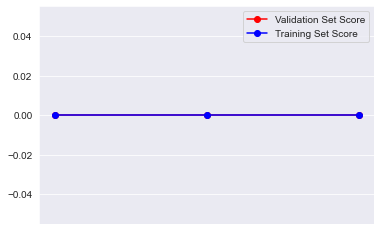

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in Forest_history], 'r-o')
plt.plot([x["train_score"] for x in Forest_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

# Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB

In [ ]:
def NaiveModelHyperParams(x, vector, **params):
    model = BernoulliNB(**params) #**params for tuning the BernoulliNB model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    Naive_history.append({"train_score":model.score(x, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel())})
    return model

In [ ]:
def NaiveTuning():
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i))  #Displaying the round/epoch and the current parameters
    model = NaiveModelHyperParams(x = clean, vector = vectorizer)  #Setting the BernoulliNB model parameters
    counter += 1;
  return model, vectorizer

**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

In [ ]:
%%time
Naive_history = []
model, vectorizer = NaiveTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.64479
Validation set score: 0.60652


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.68288
Validation set score: 0.62712


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.71903
Validation set score: 0.64274

CPU times: total: 2min 28s
Wall time: 2min 32s


Sample Predictions

In [ ]:
model

BernoulliNB()

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])), #Poltical headline

(array(['POLITICS'], dtype='<U19'),)

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['ENTERTAINMENT'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['FOOD & DRINK'], dtype='<U19')

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

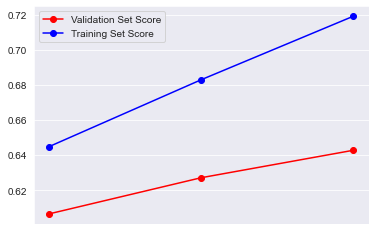

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in Naive_history], 'r-o')
plt.plot([x["train_score"] for x in Naive_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
def SGDModelHyperParams(x, vector, **params):
    model = SGDClassifier(**params) #**params for tuning the BernoulliNB model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    SGD_history.append({"train_score":model.score(x, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel())})
    return model

In [ ]:
def SGDTuning():
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i))  #Displaying the round/epoch and the current parameters
    model = SGDModelHyperParams(x = clean, vector = vectorizer ,n_jobs = -1, random_state=42, alpha = 0.0000095)  #Setting the SGD model parameters
    counter += 1
  return model, vectorizer

In [ ]:
%%time
SGD_history = []
model, vectorizer = SGDTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.76930
Validation set score: 0.69004


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.81675
Validation set score: 0.70679


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.85986
Validation set score: 0.71805

CPU times: total: 2min 55s
Wall time: 2min 38s


Sample Predictions

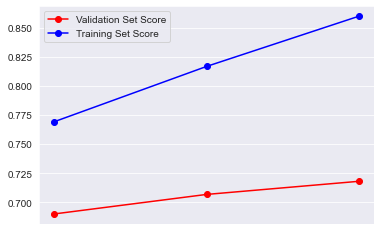

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in SGD_history], 'r-o')
plt.plot([x["train_score"] for x in SGD_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WELLNESS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

Here our model predicts the category right compared to the previous models

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTS'], dtype='<U19')

With more information the model predicts this as a Healthy Living category

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# **Conclusion**
While the models are not 100% accurate, we can see that they better than a dumb model would. When given vague headlines the model still manages to predict a category which is close to the correct category. When given a clearer headline or short description the model performs execptionally well. With some more tuning and testing of different models I am sure the predictions could be better. 

#References: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

https://plotly.com/python/

https://www.youtube.com/watch?v=i74DVqMsRWY

https://numpy.org/doc/stable/reference/index.html

